# Netflix Movies and TV Shows

https://www.kaggle.com/datasets/shivamb/netflix-shows

## Summary

#### 1. Import the Libraries
#### 2. Load dataset
#### 3. Exploratory Data Analysis
#### 4. Dealing with Missing Data
#### 5. Data Transformation
#### 6. Data Visualization
    * Distribution by Type (Movies vs. TV Shows)
    * Number of Releases Over the Years
    * Number of added Over the Month
    * Content by Country
    * Most Frequent Directors
    * Age Rating of Content
    * Recent Trends: Analysis of Date Added to the Catalog

## Import the libraries

In [58]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [59]:
# Load dataframe

df = pd.read_csv('netflix_titles.csv')

## Exploratory Data Analysis

In [60]:
# Visualize the first five lines

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [61]:
# Understanding the df format

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


That are significant missing datas in 'director', 'cast' and 'country'. We'll need to deal with the missing datas.

In [62]:
# Understanding the df format

df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Index(['release_year'], dtype='object')


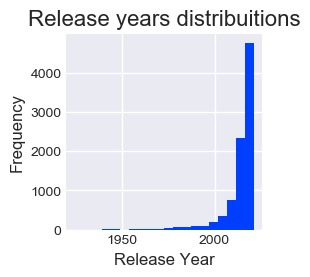

In [63]:
# Numeric Data distribution

print(df.select_dtypes(include='number').columns)

df['release_year'].plot(kind='hist', bins=20, title='Release years distribuitions')
plt.xlabel('Release Year')
plt.show()

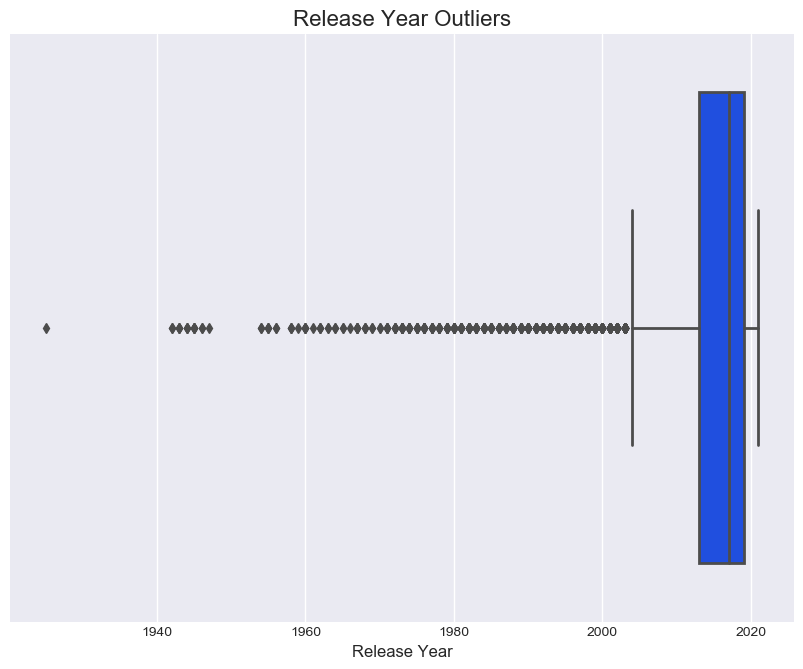

In [64]:
# Identifying Outliers with boxplot

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='release_year')
plt.title('Release Year Outliers')
plt.xlabel('Release Year')
plt.show()

We can observe that the number of movie and TV show releases has increased over the years. However, we need to conduct a more detailed analysis to accurately identify which years had the highest number of releases for movies and TV shows.


## Dealing with Missing Data

In [65]:
# Missing data

df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [66]:
# Rate of missing data

for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0:
        print(f"{i} null rate: {round(null_rate,2)}%")

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


Six columns of my df has missing datas. But, the highest rate were for director column. But, this column is important, so we will replace the missing datas.

In [67]:
# Replacing missing data

df['country'] = df['country'].fillna(df['country'].mode()[0])

"""This code fills all the missing values in the 'country' column 
    with the most frequent value in that column (the mode). It is a common technique 
    for handling missing values in categorical data."""

df['cast'].replace(np.nan, 'No Data', inplace=True)
df['director'].replace(np.nan, 'No Data', inplace=True)

# Drops
df.dropna(inplace=True)

# Drop Duplicates
df.drop_duplicates(inplace=True)

C:\Users\Izabella\AppData\Local\Temp\ipykernel_9500\284202735.py:9: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Izabella\AppData\Local\Temp\ipykernel_9500\284202735.py:10: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [68]:
# Missing data
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Data Transformation

In [69]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [70]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8702 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 892.7+ KB


## Data Visualization

In [72]:
# Columns visualization
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Distribution by Type (Movies vs. TV Shows)

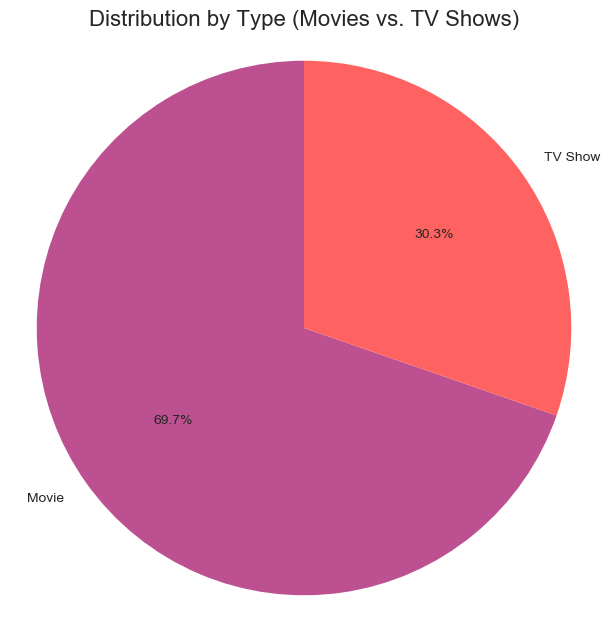

In [73]:
# Proportion of movies to TV Show available
proportion = df['type'].value_counts()

# Graphic
plt.figure(figsize=(6,6))
plt.pie(proportion, labels=proportion.index, autopct='%1.1f%%', startangle=90, colors=['#bc5090', '#ff6361'])
plt.title('Distribution by Type (Movies vs. TV Shows)')
plt.axis('equal')
plt.show()

This graphic illustrates the proportion of movies to TV shows available on the platform. We can see that movies constitute the majority. To draw more meaningful conclusions, it would be valuable to analyze which type -movies or TV shows- receives the most viewer requests.


### Number of Releases Over the Years

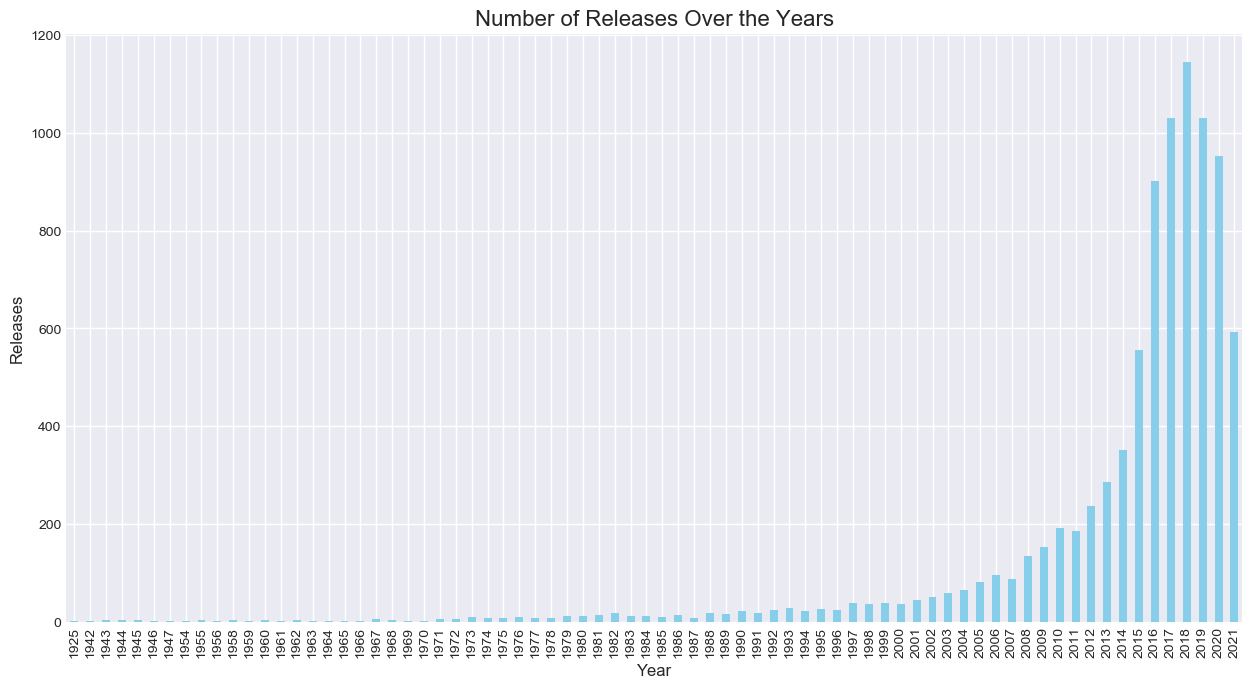

In [74]:
# Loan count
loan_year = df['release_year'].value_counts().sort_index()

# Griphic Visualization
plt.figure(figsize=(12,6))
loan_year.plot(kind='bar', color='skyblue')

plt.title('Number of Releases Over the Years')
plt.xlabel('Year')
plt.ylabel('Releases')

plt.show()

As the graph shows, 2018 had the highest number of movie and TV show releases. However, the current visualization makes it difficult to clearly see the data trends. To gain a better perspective, we will focus on the last 10 years to better illustrate the number of releases during this period.

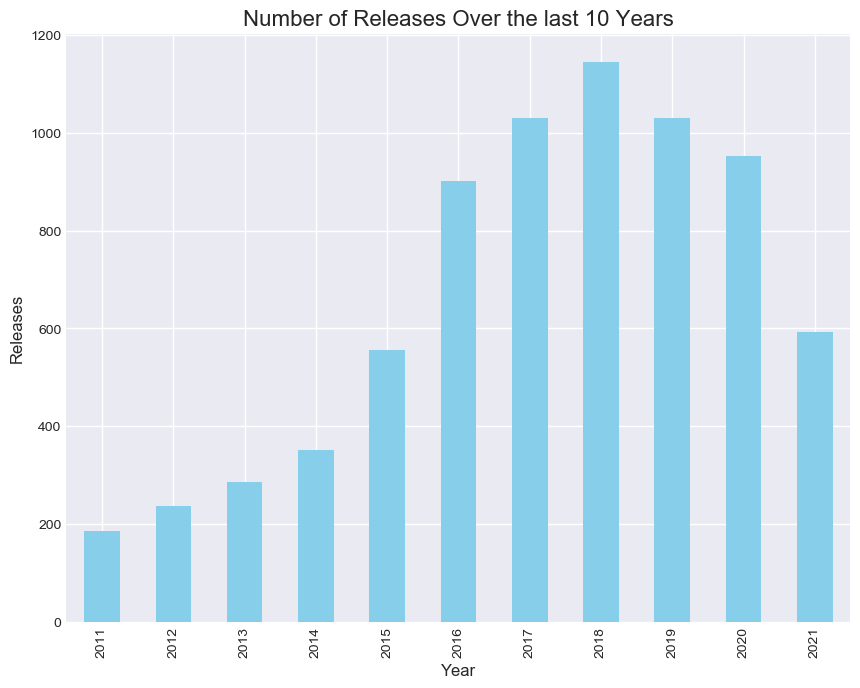

In [75]:
# Filters data from the last 20 years
filtered_df = df[df['release_year'] >= (2021-10)]

# Loan count
loan_year = filtered_df['release_year'].value_counts().sort_index()

# Griphic Visualization 
plt.figure(figsize=(8,6))
loan_year.plot(kind='bar', color='skyblue')

plt.title('Number of Releases Over the last 10 Years')
plt.xlabel('Year')
plt.ylabel('Releases')

plt.show()

Now the results are much clearer. The graph shows that 2018 had the highest number of movie and TV show releases, closely followed by 2017 and 2019. It would be beneficial for the streaming platform to investigate why 2018 experienced this peak in releases. Understanding the factors behind this surge could provide valuable insights for future content planning and strategy development.

### Number of added Over the Month

In [76]:
# Creating a column with month
df['month_added'] = df['date_added'].dt.month_name()

# Count how many movies and TV shows were made
month_count = df['month_added'].value_counts()

# Sort by months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December']

month_count = month_count.reindex(months)
month_count

month_added
January      726
February     556
March        733
April        758
May          626
June         724
July         819
August       748
September    764
October      755
November     697
December     796
Name: count, dtype: int64

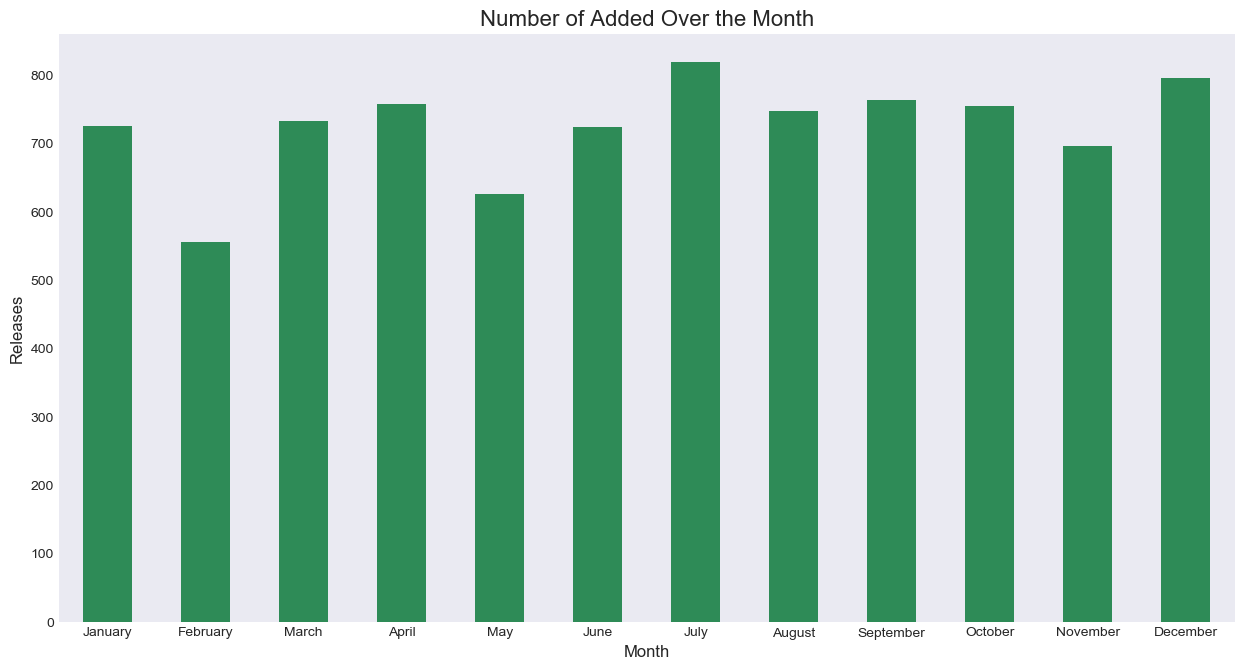

In [77]:
# Graphic visualization
plt.figure(figsize=(12,6))
month_count.plot(kind='bar', color='seagreen')

plt.title('Number of Added Over the Month')
plt.xlabel('Month')
plt.ylabel('Releases')
plt.grid(False)

plt.xticks(rotation=0)
plt.show()

The month with the highest number of additions -- whether movies or TV shows -- was July, followed closely by December. However, the other months showed little variation in their totals. Therefore, we can conclude that analyzing the data by month may not yield significant insights.  

### Content by Country

In [78]:
# Top 10 countries with most production
country_top10 = df['country'].value_counts().head(10).reset_index()
country_top10

,country,count
0,United States,3638
1,India,972
2,United Kingdom,418
3,Japan,243
4,South Korea,199
5,Canada,181
6,Spain,145
7,France,124
8,Mexico,110
9,Egypt,106


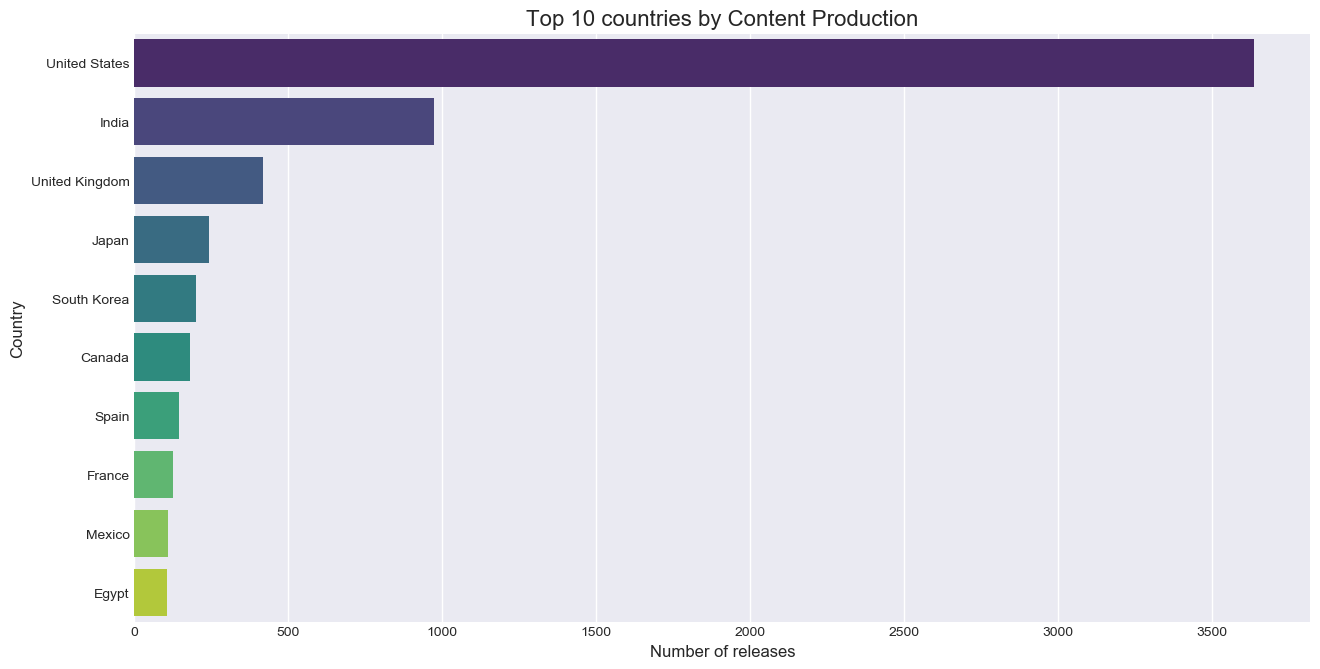

In [79]:
# Graphic visualization
country_top10.columns = ['country', 'count']
plt.figure(figsize=(12,6))
sns.barplot(data=country_top10, y='country', x='count', palette='viridis')
plt.title('Top 10 countries by Content Production')
plt.xlabel('Number of releases')
plt.ylabel('Country')
plt.show()

The country that produces the most movies and TV shows is the United State, followed closely by India and United Kigndom. This dominance suggests that these countries have well-estabilished entertainment industries and significant resourves dedicated to content creation. Understanding the factors contributing to their production capabilities could provide valuable insights for other countries looking to enhance their media industries. 

### Most Frequent Directors

In [80]:
# Top 5 Movie Directors
top_movie_director_USA = df.query('country == "United States" and type == "Movie" and director != "No Data"')['director'].value_counts().head(5).reset_index()

top_movie_director_india = df.query('country == "India" and type == "Movie" and director != "No Data"')['director'].value_counts().head(5).reset_index()

top_movie_director_UK = df.query('country == "United Kingdom" and type == "Movie" and director != "No Data"')['director'].value_counts().head(5).reset_index()

In [81]:
# Top 5 TV Show Directors
top_tv_director_USA = df.query('country == "United States" and type == "TV Show" and director != "No Data"')['director'].value_counts().head(5).reset_index()

top_tv_director_india = df.query('country == "India" and type == "TV Show" and director != "No Data"')['director'].value_counts().head(5).reset_index()

top_tv_director_UK = df.query('country == "United Kingdom" and type == "TV Show" and director != "No Data"')['director'].value_counts().head(5).reset_index()

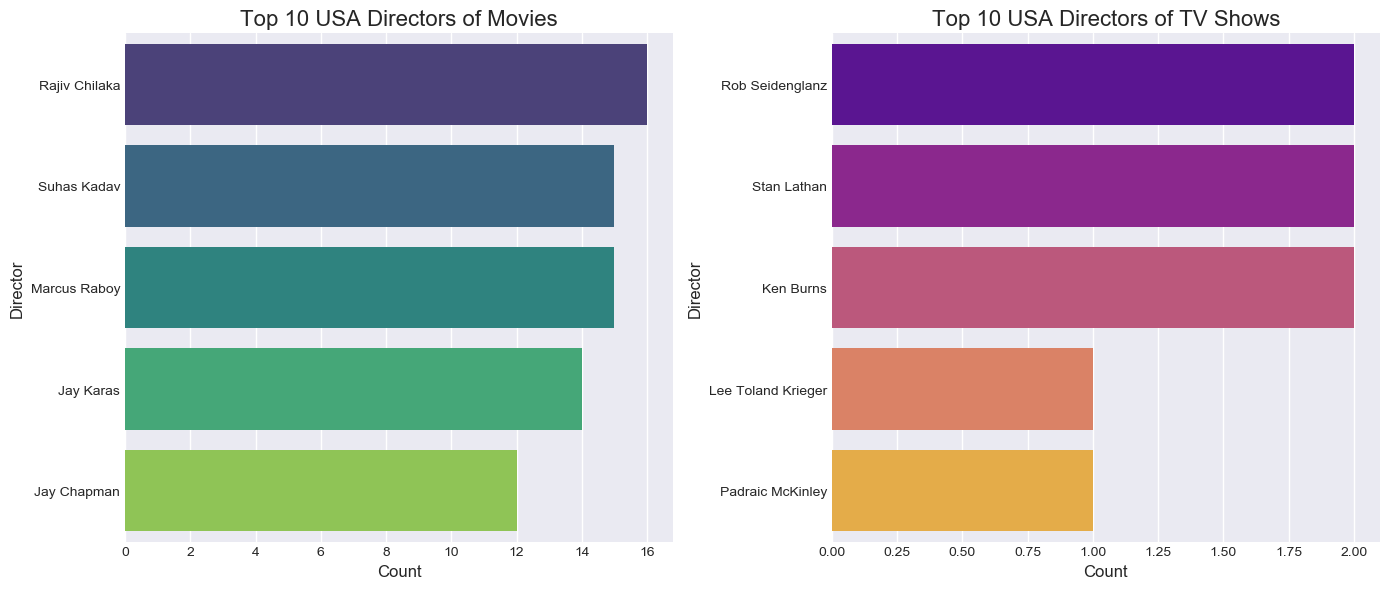

In [82]:
# Graphic visualization Top 5 Movie/TV Show Directors USA
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sns.barplot(data=top_movie_director_USA, y='director', x='count', palette='viridis', ax=axes[0])
axes[0].set_title('Top 10 USA Directors of Movies')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Director')

sns.barplot(data=top_tv_director_USA, y='director', x='count', palette='plasma', ax=axes[1])
axes[1].set_title('Top 10 USA Directors of TV Shows')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Director')

plt.tight_layout()
plt.show()

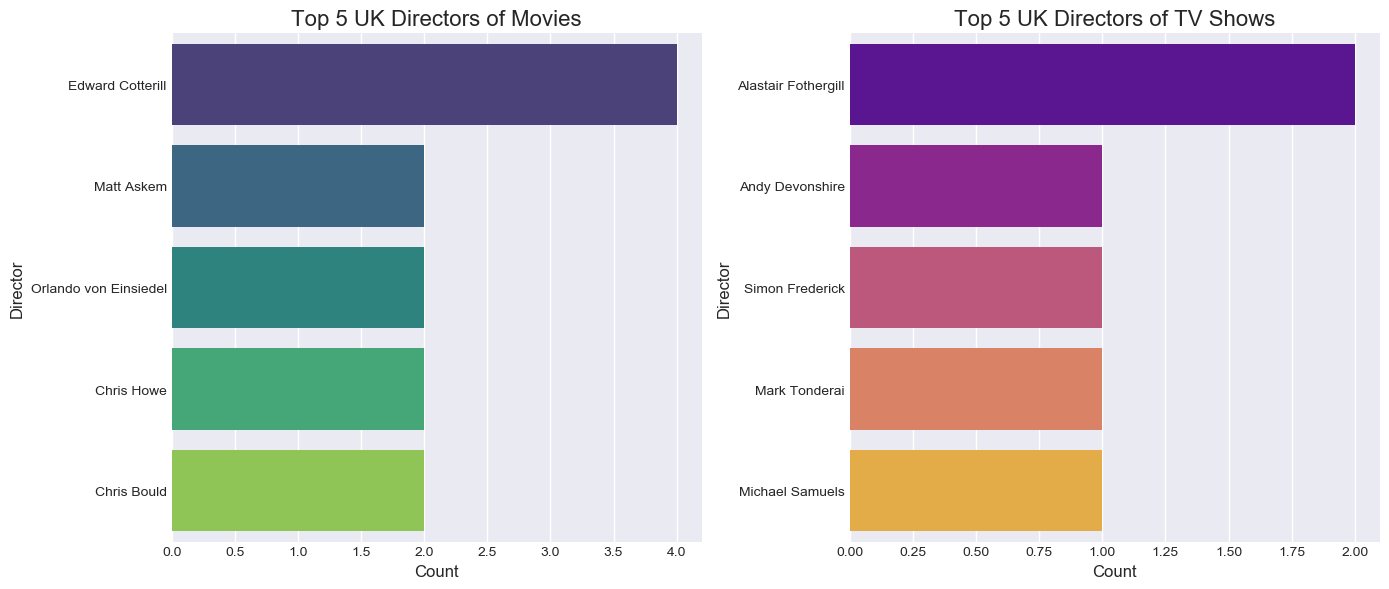

In [83]:
# Graphic visualization Top 5 Movie/TV Show Directors India
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sns.barplot(data=top_movie_director_UK, y='director', x='count', palette='viridis', ax=axes[0])
axes[0].set_title('Top 5 UK Directors of Movies')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Director')

sns.barplot(data=top_tv_director_UK, y='director', x='count', palette='plasma', ax=axes[1])
axes[1].set_title('Top 5 UK Directors of TV Shows')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Director')

plt.tight_layout()
plt.show()

The director who appears most frequently on Netflix in USA for movies is Rajiv Chilaka, while Rob Seidenglanz leads for TV Showa. In the UK, Edward Cotterill tops the list for movies, and Alastair Fothergill is the most frequent director for TV shows.

In [84]:
# Top 10 genre of Movie
genre_content = df.query('type == "Movie"')['listed_in'].value_counts().head(10).reset_index()
genre_content

,listed_in,count
0,"Dramas, International Movies",362
1,Documentaries,359
2,Stand-Up Comedy,334
3,"Comedies, Dramas, International Movies",274
4,"Dramas, Independent Movies, International Movies",252
5,Children & Family Movies,215
6,"Children & Family Movies, Comedies",201
7,"Documentaries, International Movies",186
8,"Dramas, International Movies, Romantic Movies",180
9,"Comedies, International Movies",176


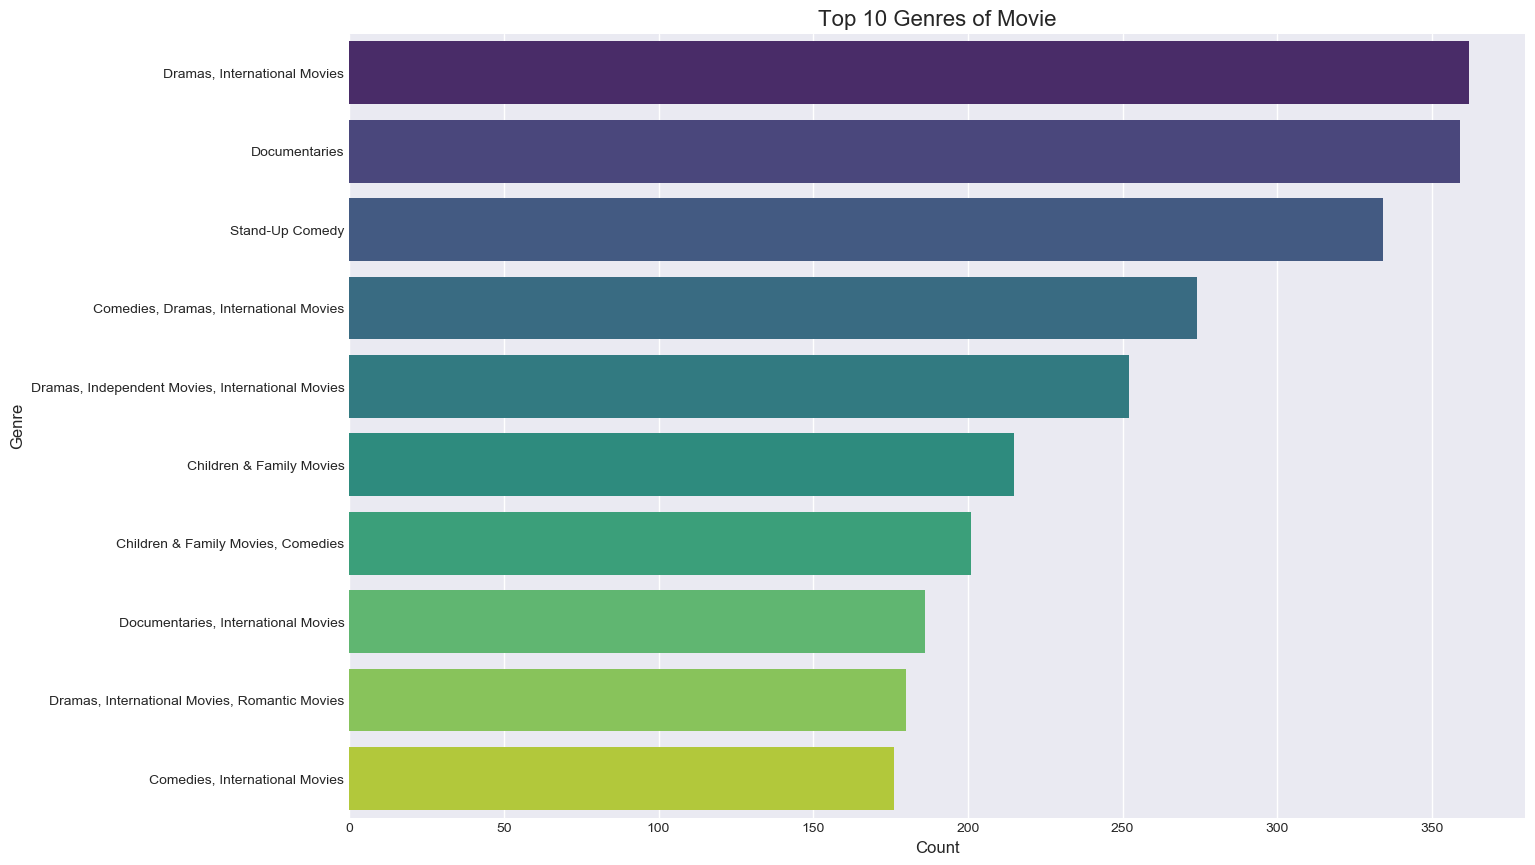

In [85]:
# Graphic visualization
genre_content.columns = ['listed_in', 'count']
plt.figure(figsize=(12,8))
sns.barplot(data=genre_content, y='listed_in', x='count', palette='viridis')
plt.title('Top 10 Genres of Movie')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [86]:
# Top 10 genre of TV Show
genre_content = df.query('type == "TV Show"')['listed_in'].value_counts().head(10).reset_index()
genre_content

,listed_in,count
0,Kids' TV,219
1,"International TV Shows, TV Dramas",121
2,"Crime TV Shows, International TV Shows, TV Dramas",110
3,"Kids' TV, TV Comedies",97
4,Reality TV,95
5,"International TV Shows, Romantic TV Shows, TV ...",94
6,"International TV Shows, Romantic TV Shows, TV ...",90
7,"Anime Series, International TV Shows",87
8,Docuseries,84
9,TV Comedies,68


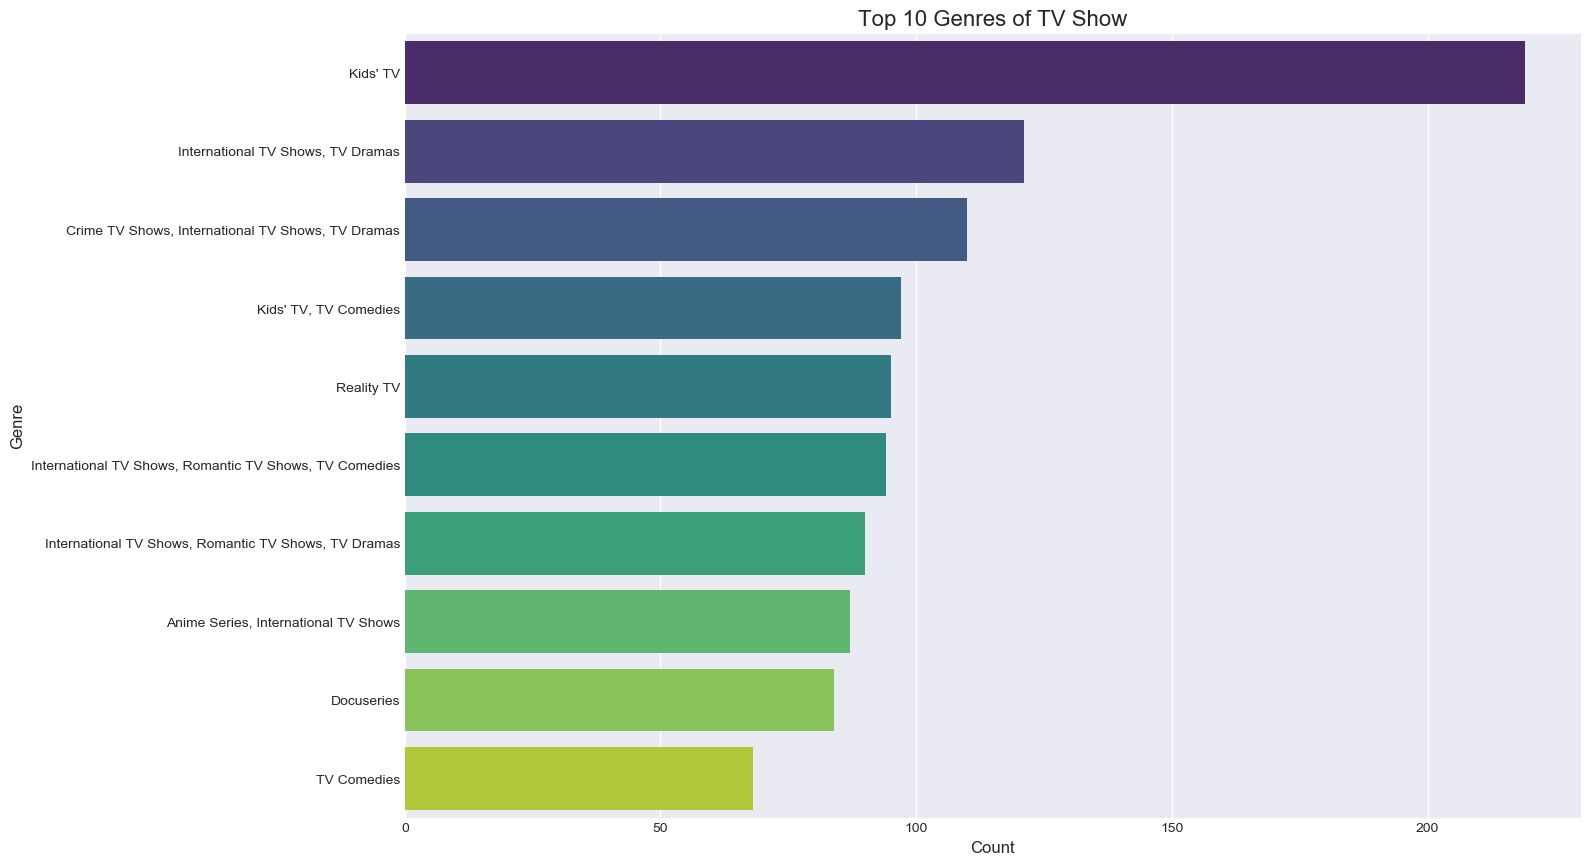

In [87]:
# Graphic visualization
genre_content.columns = ['listed_in', 'count']
plt.figure(figsize=(12,8))
sns.barplot(data=genre_content, y='listed_in', x='count', palette='viridis')
plt.title('Top 10 Genres of TV Show')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In general, the most common genres for movies on Netflix are Dramas and International Movies, closely followed by Documentaries. For TV shows, the most prevalent genres are Kids' TV, followed by International TV Shows and TV Dramas.
There are some insights we can obtain from the datas:
* Audience Preferences: Dramas and International Movies are popular, suggesting viewers seek emotional and diverse narratives.
* Demand for Documentaries: The significant interest in Documentaries indicates a growing appetite for informative content.
* Focus on Kids' Content: Kids' TV's prominence highlights Netflix as a favored choice for families, prompting more family-friendly programming.
* Diverse Genres: The popularity of TV Dramas and International Shows suggests viewers are open to exploring varied content.
* Trend Analysis: Comparing genre trends across movies and TV can guide Netflix in refining content strategy and marketing efforts.

### Age Rating of Content



In [88]:
# Unique values of rating
rating = sorted(df['rating'].unique())
rating

['G',
 'NC-17',
 'NR',
 'PG',
 'PG-13',
 'R',
 'TV-14',
 'TV-G',
 'TV-MA',
 'TV-PG',
 'TV-Y',
 'TV-Y7',
 'TV-Y7-FV',
 'UR']

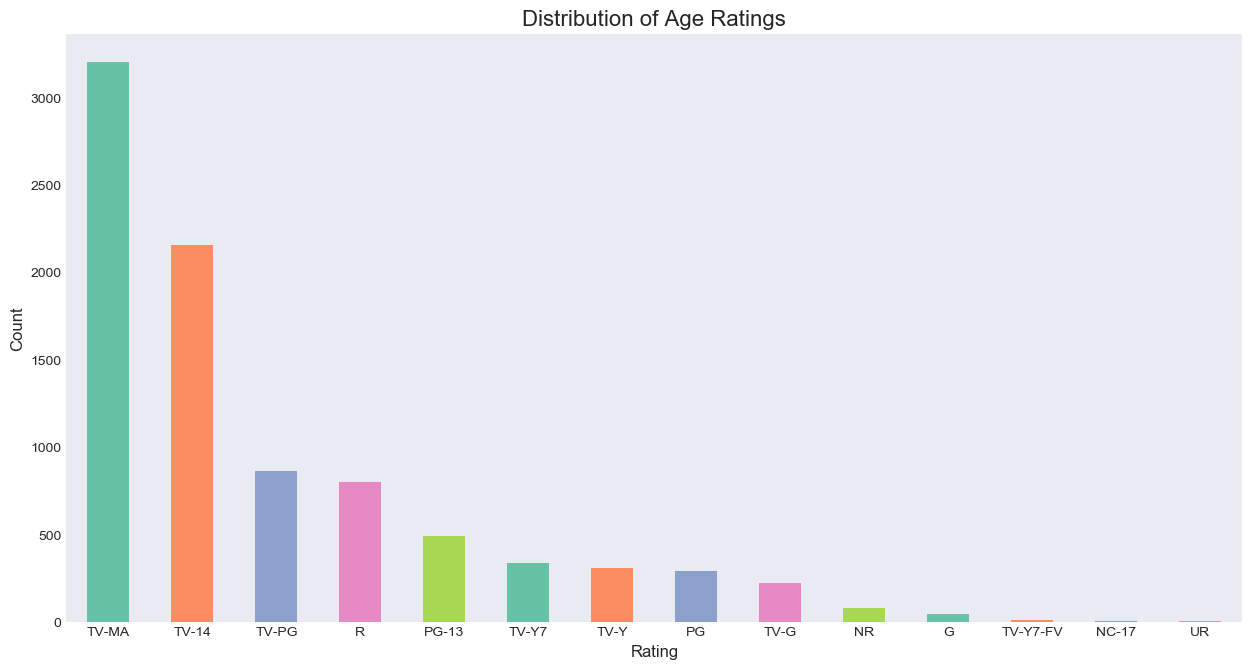

In [89]:
# Rating count
rating_count = df['rating'].value_counts()

# Graphic visualization
plt.figure(figsize=(12,6))
rating_count.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854'])

plt.title('Distribution of Age Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(False)

plt.xticks(rotation=0)
plt.show()

The majority of Netflix’s content is for mature audiences, making parental supervision crucial to monitor what children are watching. This trend suggests a focus on older demographics, potentially limiting family-friendly options. There is an opportunity for Netflix to expand its library of child-appropriate content to cater to families better. Educating parents about content ratings is essential for informed viewing choices. 

#### Translation for the movie and TV ratings

* G (General Audience): Suitable for all ages. Contains no material that would offend or harm.

* PG (Parental Guidance): Some parts of the film may not be suitable for children. Parents are encouraged to watch with their children.

* PG-13 (Parents Strongly Cautioned): Content that may be inappropriate for children under 13. May contain some references to violence, language, or adult themes.

* R (Restricted): Content intended for adults. Minors under 17 must be accompanied by an adult to watch.

* NC-17 (No One 17 and Under Admitted): Content for adults only. Not suitable for viewers under 17.

* NR (Not Rated): Has not been submitted for an official rating.

* TV-G (General Audience): Suitable for all ages.

* TV-PG (Parental Guidance): Content that may not be suitable for children. Parental guidance is recommended.

* TV-14 (Parents Strongly Cautioned): Content not suitable for children under 14.

* TV-MA (Mature Audiences): Content intended for adults only. Not suitable for minors.

* TV-Y (All Children): Suitable for all children, including the youngest.

* TV-Y7 (Directed to Older Children): Content directed at children aged 7 and above, which may not be suitable for younger children.

* TV-Y7-FV (Directed to Older Children - Fantasy Violence): Programming directed at children aged 7 and above, containing fantasy violence.

* UR (Unrated): Program or film that has not received a rating, usually because it was not submitted.

### Recent Trends: Analysis of Date Added to the Catalog



C:\Users\Izabella\AppData\Local\Temp\ipykernel_9500\1502272508.py:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



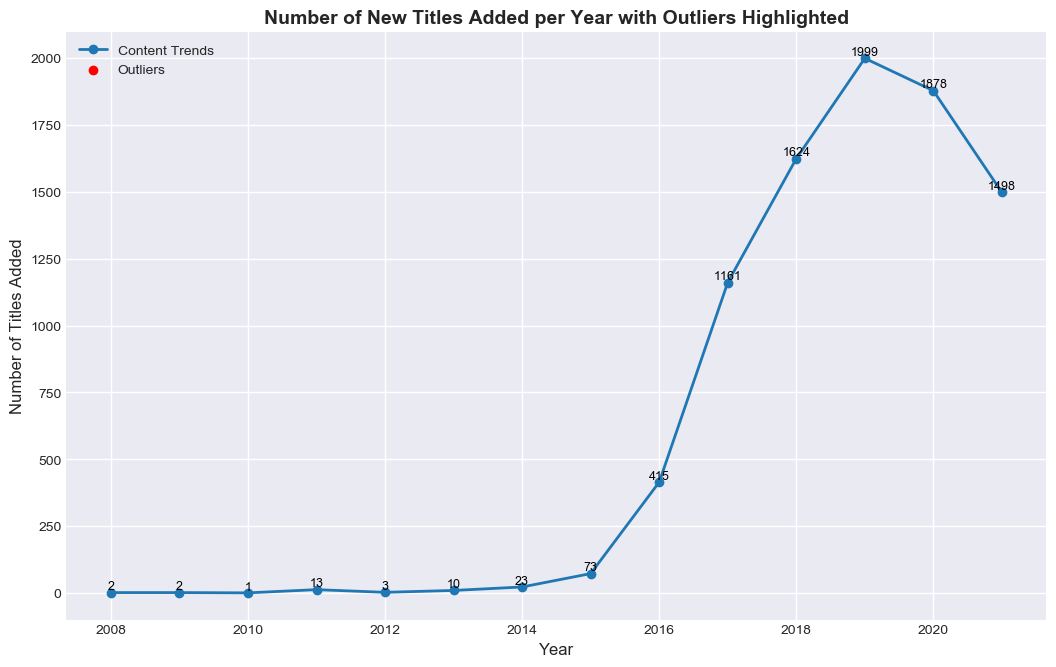

In [90]:
# Set the chart style
plt.style.use('seaborn-darkgrid')

# New column for the year added
df['year_added'] = pd.to_datetime(df['date_added']).dt.year

# Grouping data by year and counting the number of titles
content_trends = df.groupby('year_added')['title'].count()

# Calculating Quartiles and IQR (Interquartile Range)
Q1 = np.percentile(content_trends, 25)
Q3 = np.percentile(content_trends, 75)
IQR = Q3 - Q1

# Setting lower and upper bounds to detect outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Identifying outliers
outliers = content_trends[(content_trends < lower_bound) | (content_trends > upper_bound)]

# Creating the graph with labels on the points
plt.figure(figsize=(10,6))
content_trends.plot(kind='line', marker='o', color='#1f77b4', label='Content Trends')

# Add labels with title numbers at each point
for year, count in content_trends.items():
    plt.text(year, count, str(count), ha='center', va='bottom', fontsize=9, color='black')

# Highlighting outliers in the graph
plt.scatter(outliers.index, outliers.values, color='red', label='Outliers', zorder=10)

# Adding labels to outlier points
for year, count in outliers.items():
    plt.text(year, count, str(count), ha='center', va='bottom', fontsize=9, color='red')
    
# Adding details to the chart
plt.title('Number of New Titles Added per Year with Outliers Highlighted', fontsize=14, fontweight='bold')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Number of Titles Added',fontsize=12)
plt.legend()
plt.grid(True)


    
plt.show()

This chart illustrates the number of news titles added to Netflix's catalog over the years, revealing a sharp increase in the number of additions from 2010 to 2018. This rise suggests that Netflix was making substantial investments to rapidly expand its catalog. However, from 2018 onwards, there is a notable decrease in additions, which may be related to the impact of the pandemic on content production and acquisition.